**1. Cancer Diagnostics**
---
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. <br>
**Attribute Information** <br>
Ten real-valued features are computed for each cell nucleus: <br>

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>

The response classes are 1 for **Malignant** and 2 for **Benign**

In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
cancer_diag = loadmat('Datasets.mat/Breast_Cancer_diagnostic.mat')

df = pd.DataFrame(cancer_diag.get('X'))
df['y'] = cancer_diag.get('y').ravel()

In [5]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
225,14.340,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.90,110.40,873.2,0.1297,0.1525,0.16320,0.10870,0.3062,0.06072,2
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,31.31,90.67,624.0,0.1227,0.3454,0.39110,0.11800,0.2826,0.09585,2
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,17.70,65.27,302.0,0.1015,0.1248,0.09441,0.04762,0.2434,0.07431,2
401,11.930,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,2
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,24.39,73.07,390.2,0.1301,0.2950,0.34860,0.09910,0.2614,0.11620,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 225 to 567
Data columns (total 31 columns):
0     455 non-null float64
1     455 non-null float64
2     455 non-null float64
3     455 non-null float64
4     455 non-null float64
5     455 non-null float64
6     455 non-null float64
7     455 non-null float64
8     455 non-null float64
9     455 non-null float64
10    455 non-null float64
11    455 non-null float64
12    455 non-null float64
13    455 non-null float64
14    455 non-null float64
15    455 non-null float64
16    455 non-null float64
17    455 non-null float64
18    455 non-null float64
19    455 non-null float64
20    455 non-null float64
21    455 non-null float64
22    455 non-null float64
23    455 non-null float64
24    455 non-null float64
25    455 non-null float64
26    455 non-null float64
27    455 non-null float64
28    455 non-null float64
29    455 non-null float64
y     455 non-null uint8
dtypes: float64(30), uint8(1)
memory usage: 110.6 KB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.200490,19.290769,92.536813,663.651429,0.096372,0.106133,0.092440,0.050431,0.181918,0.062963,...,25.680791,108.205297,899.411429,0.132124,0.256893,0.278127,0.115942,0.290684,0.084279,1.626374
std,3.624933,4.180846,25.068684,360.477823,0.013841,0.054881,0.083835,0.040693,0.028369,0.007112,...,6.022208,35.127163,596.682865,0.022454,0.159351,0.215095,0.067139,0.063391,0.018400,0.484299
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.116700,0.050250,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,1.000000
25%,11.675000,16.210000,75.100000,417.950000,0.086210,0.064130,0.029035,0.020175,0.162000,0.057885,...,21.005000,83.640000,511.500000,0.116200,0.148000,0.113450,0.064075,0.248450,0.072025,1.000000
50%,13.450000,18.890000,87.020000,558.100000,0.095780,0.094450,0.061550,0.033700,0.178800,0.061660,...,25.470000,98.270000,694.400000,0.130900,0.211900,0.229800,0.099750,0.281500,0.079870,2.000000
75%,16.090000,21.790000,105.450000,801.550000,0.105300,0.131500,0.138200,0.077570,0.197050,0.066120,...,29.585000,128.450000,1160.500000,0.146200,0.341600,0.390000,0.166100,0.319000,0.092165,2.000000
max,27.420000,33.810000,186.900000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.209800,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


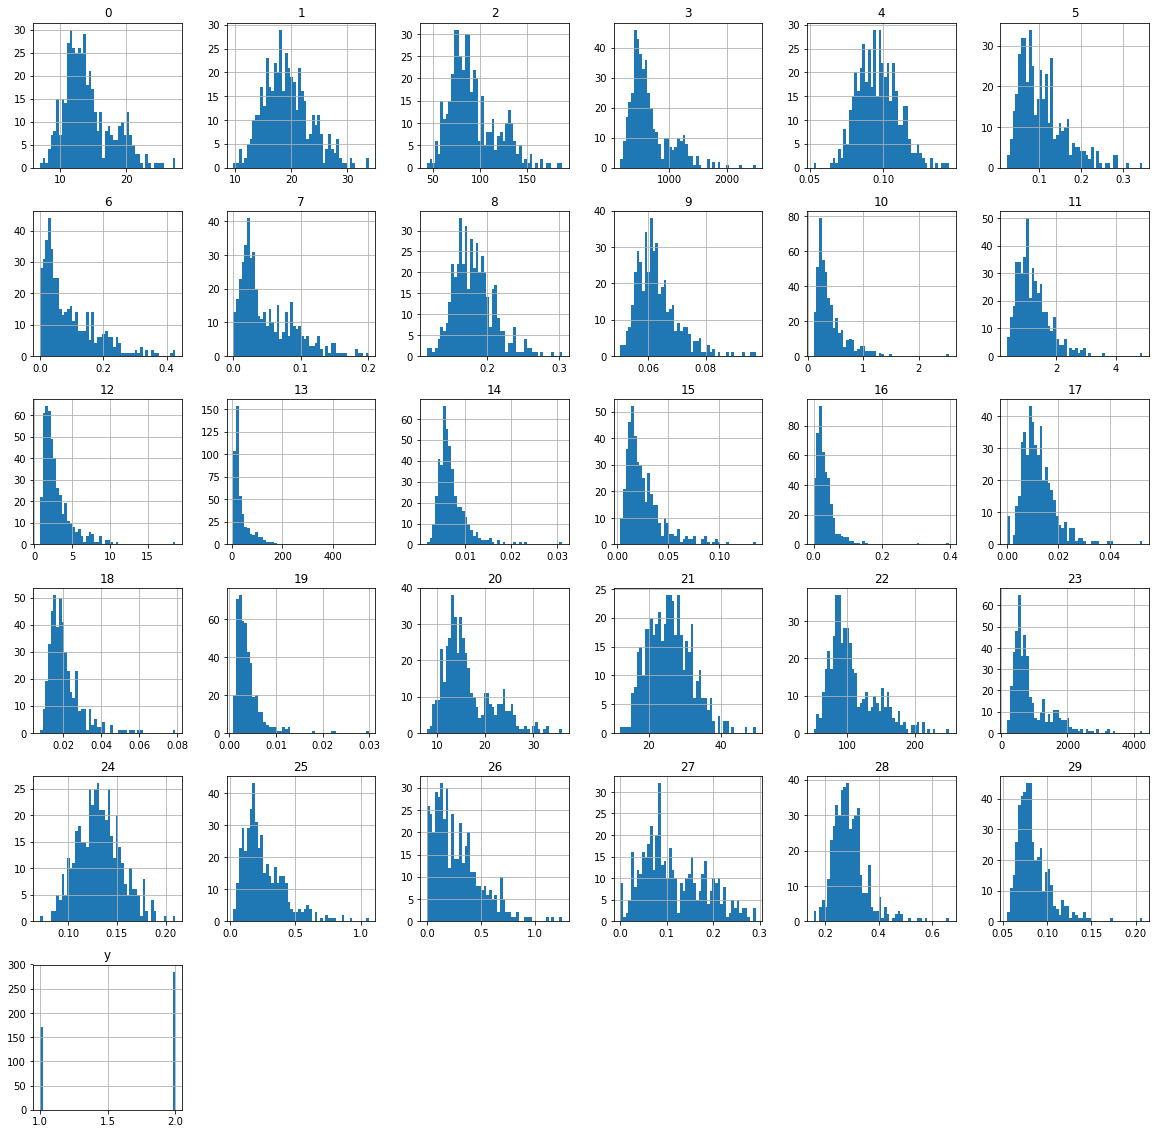

In [9]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

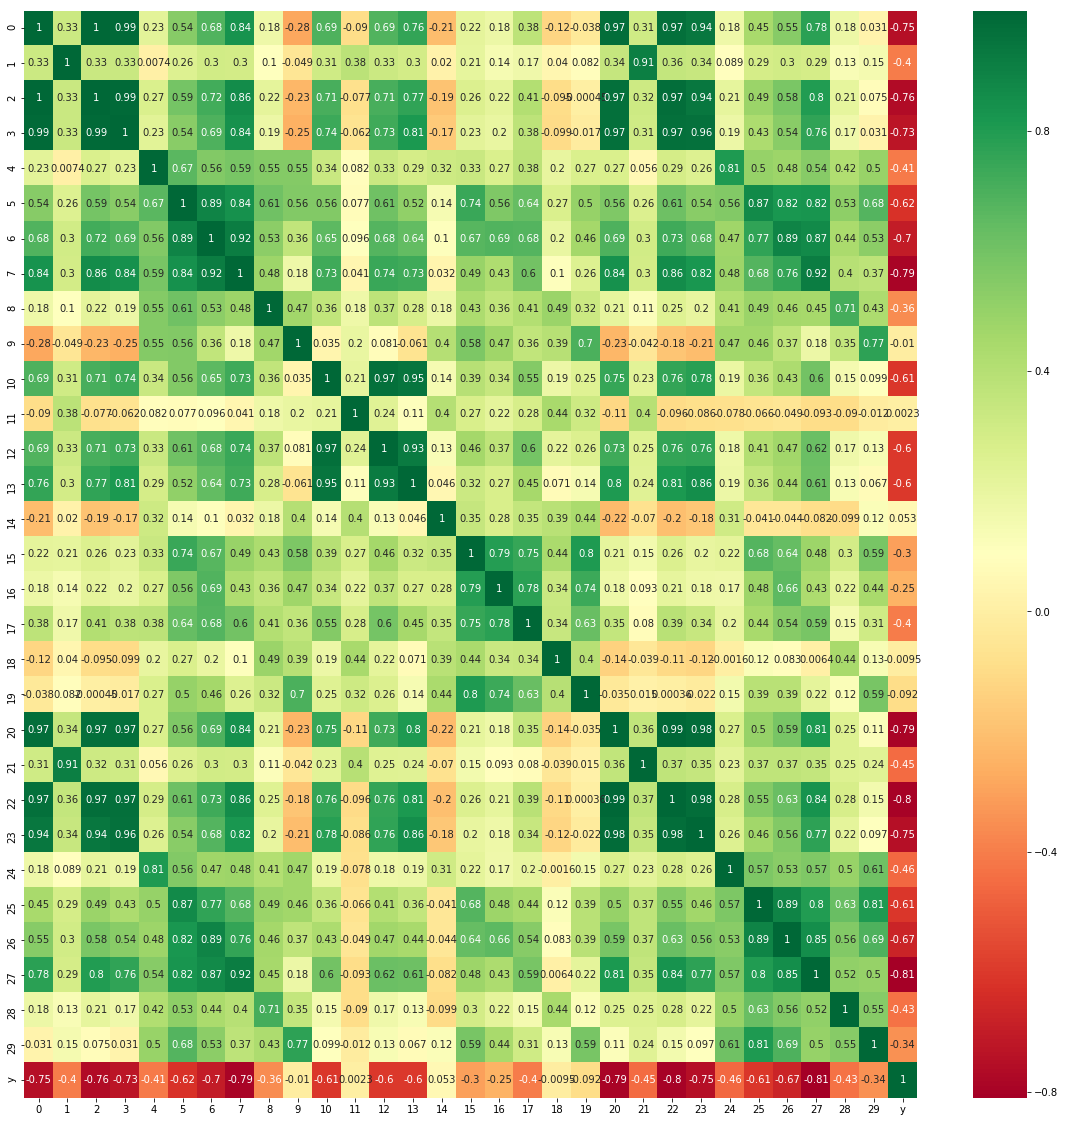

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [11]:
corrmat['y'].sort_values(ascending=True)

27   -0.809459
22   -0.796260
20   -0.790725
7    -0.788512
2    -0.760340
0    -0.747945
23   -0.747496
3    -0.730596
6    -0.703093
26   -0.669848
5    -0.621391
25   -0.610352
10   -0.610273
13   -0.599302
12   -0.599109
24   -0.456897
21   -0.449551
28   -0.434250
4    -0.407916
1    -0.401784
17   -0.400978
8    -0.358046
29   -0.343096
15   -0.303372
16   -0.245768
19   -0.091933
9    -0.009983
18   -0.009468
11    0.002304
14    0.053082
y     1.000000
Name: y, dtype: float64

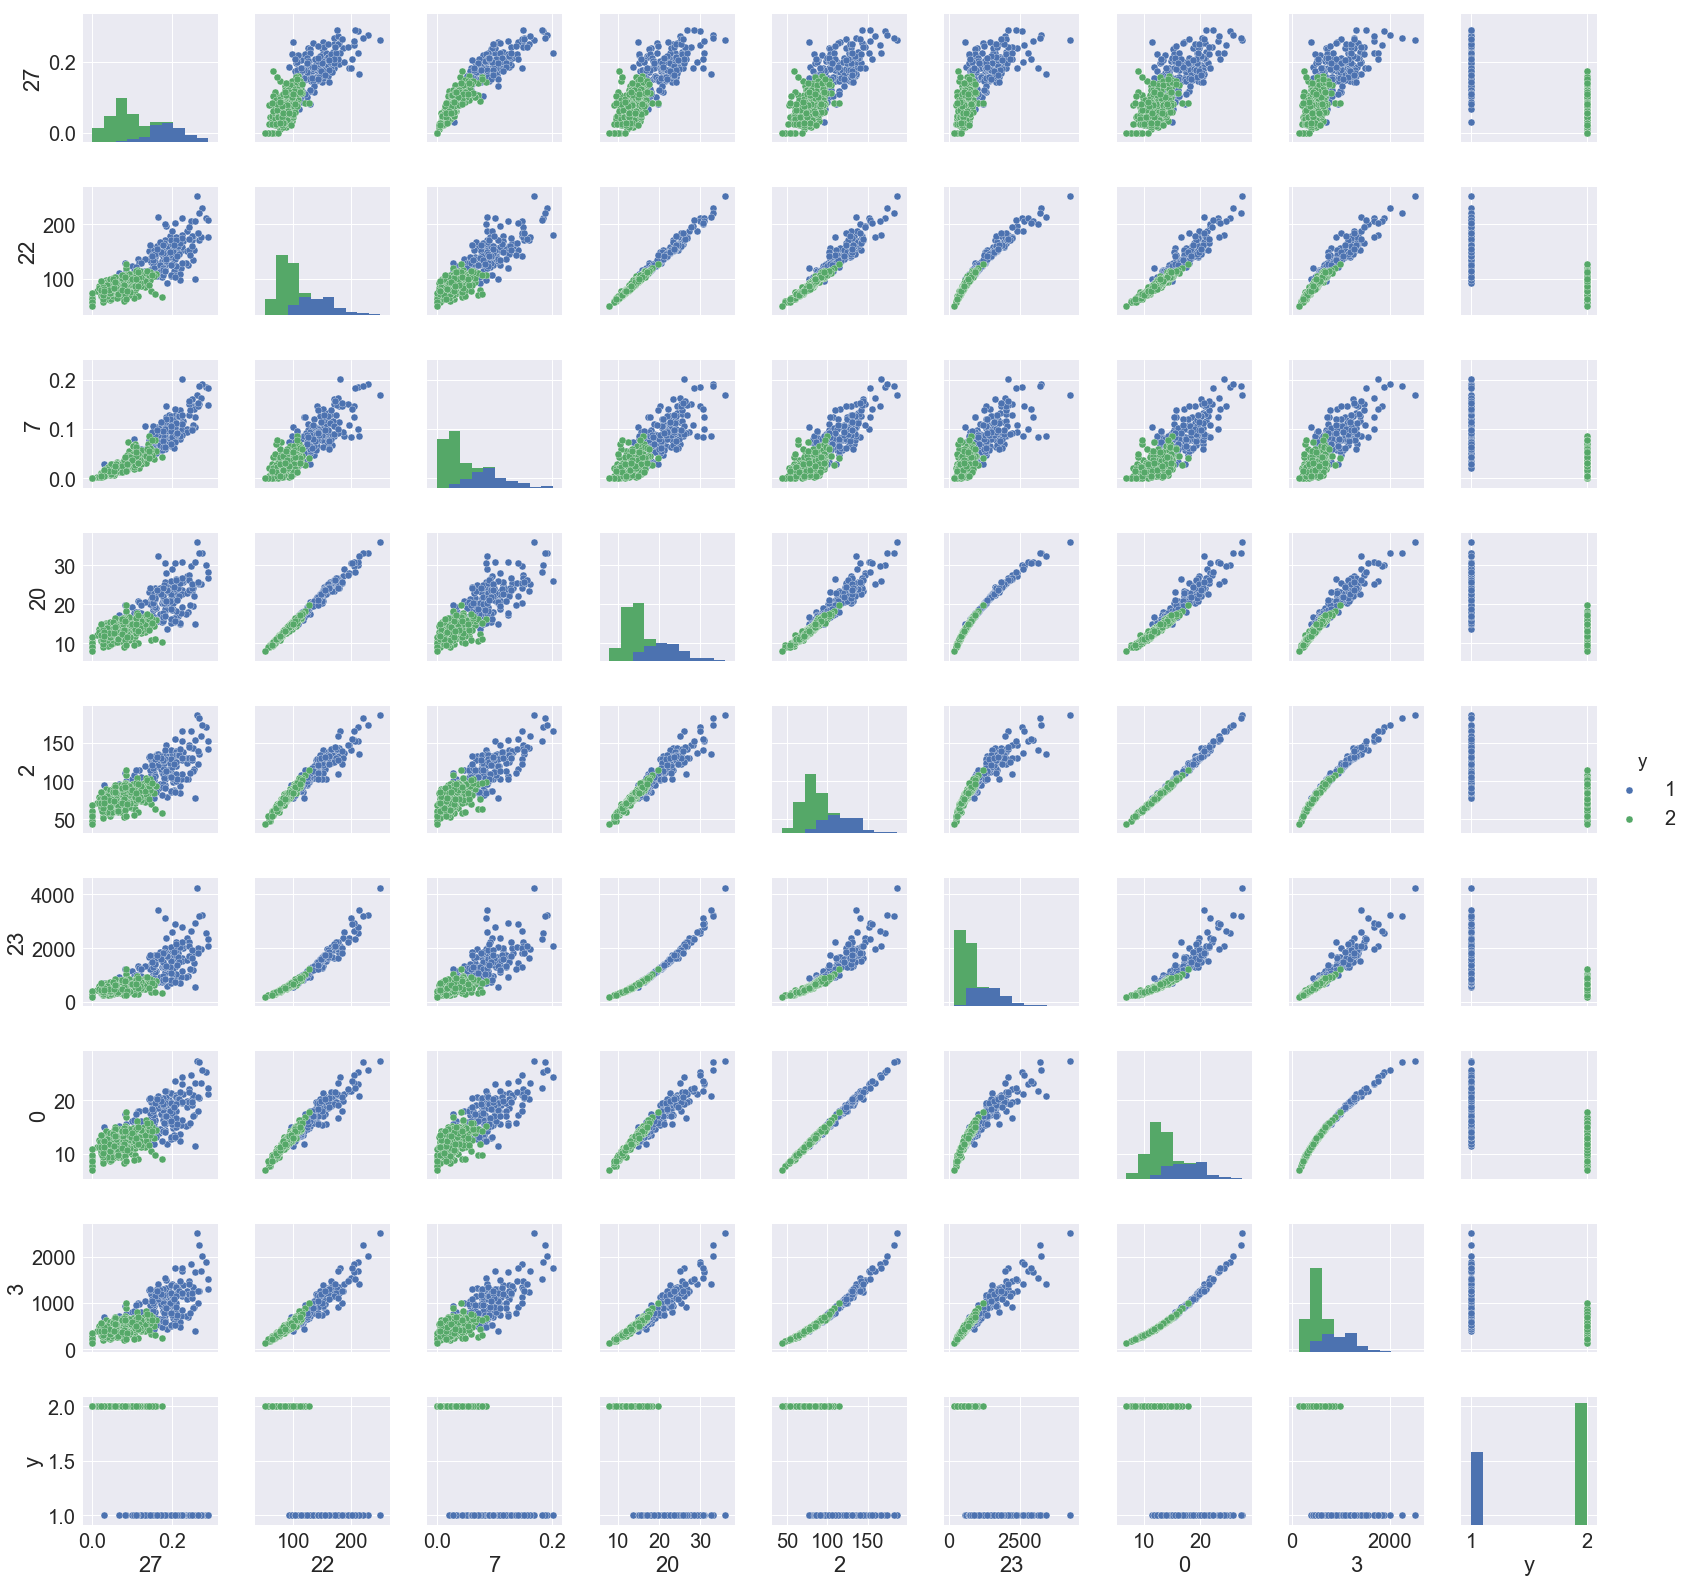

In [12]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[27,22, 7,20,2,23,0,3,'y']], hue='y')

In [13]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.626374
1    0.373626
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [14]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [15]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.947 (+/- 0.030)
The IQR is 0.045 between [0.93,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.91      0.93      1700
         2.0       0.95      0.97      0.96      2850

    accuracy                           0.95      4550
   macro avg       0.95      0.94      0.94      4550
weighted avg       0.95      0.95      0.95      4550

The average training time is 0.005614 seconds


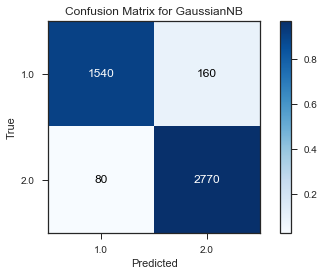

In [16]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), df['y'], classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.92
              precision    recall  f1-score   support

           1       0.81      0.97      0.88        35
           2       0.99      0.90      0.94        79

    accuracy                           0.92       114
   macro avg       0.90      0.94      0.91       114
weighted avg       0.93      0.92      0.92       114



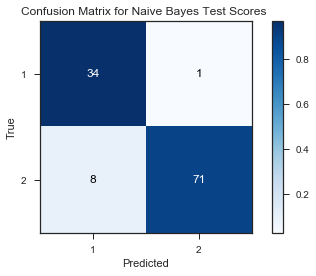

In [17]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.954 (+/- 0.030)
The IQR is 0.043 between [0.93,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94      1700
         2.0       0.96      0.97      0.96      2850

    accuracy                           0.95      4550
   macro avg       0.95      0.95      0.95      4550
weighted avg       0.95      0.95      0.95      4550

The average training time is 0.009958 seconds


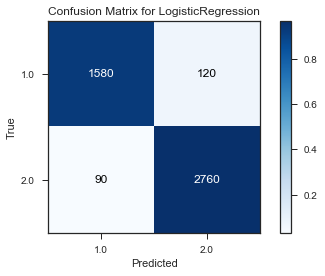

In [18]:
val_conf_LR, val_scores_LR, val_time_LR = classify(df.drop('y',axis=1), df['y'],
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

The test accuracy is 0.93
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        38
           2       0.97      0.92      0.95        76

    accuracy                           0.93       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



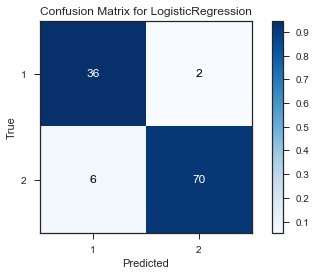

In [19]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(df_test.drop('y',axis=1))
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.959 (+/- 0.028)
The IQR is 0.065 between [0.93,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94      1700
         2.0       0.96      0.97      0.97      2850

    accuracy                           0.96      4550
   macro avg       0.96      0.95      0.96      4550
weighted avg       0.96      0.96      0.96      4550

The average training time is 0.933587 seconds


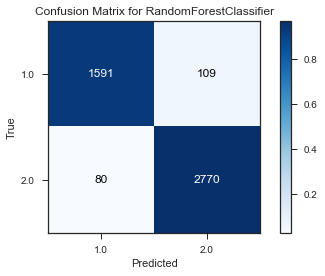

In [20]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500, n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.95
              precision    recall  f1-score   support

           1       0.90      0.95      0.93        40
           2       0.97      0.95      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



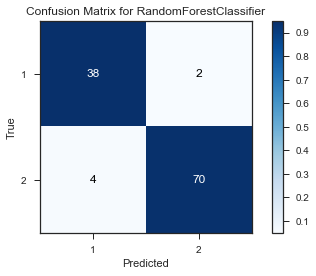

In [21]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500,n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.982 (+/- 0.013)
The IQR is 0.022 between [0.98,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98      1700
         2.0       0.98      1.00      0.99      2850

    accuracy                           0.98      4550
   macro avg       0.98      0.98      0.98      4550
weighted avg       0.98      0.98      0.98      4550

The average training time is 0.814095 seconds


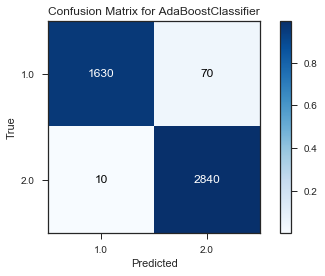

In [22]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.96
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        37
           2       1.00      0.94      0.97        77

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



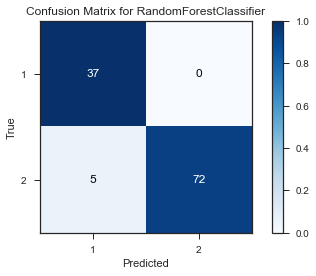

In [23]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [24]:
np.shape(df['y'])

(455,)

The model score is 0.961 (+/- 0.030)
The IQR is 0.043 between [0.93,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95      1700
         2.0       0.97      0.96      0.97      2850

    accuracy                           0.96      4550
   macro avg       0.96      0.96      0.96      4550
weighted avg       0.96      0.96      0.96      4550

The model score is 0.954 (+/- 0.027)
The IQR is 0.045 between [0.93,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94      1700
         2.0       0.98      0.95      0.96      2850

    accuracy                           0.95      4550
   macro avg       0.95      0.96      0.95      4550
weighted avg       0.96      0.95      0.95      4550

The model score is 0.974 (+/- 0.022)
The IQR is 0.043 between [0.96,1.00]
There is 0 deleted rows
              precision    recall  f1-score   suppor

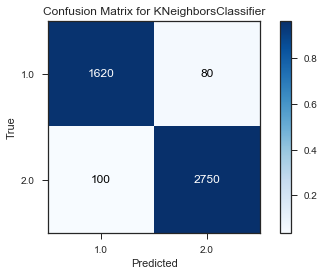

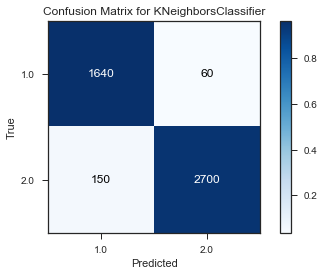

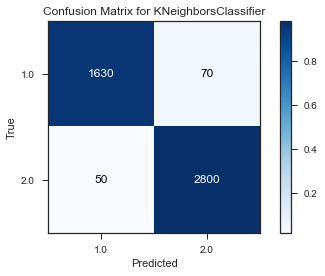

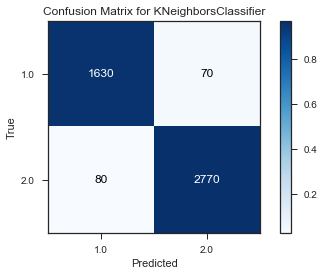

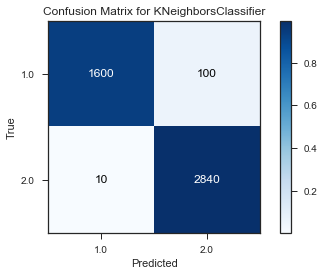

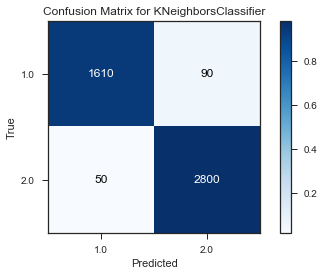

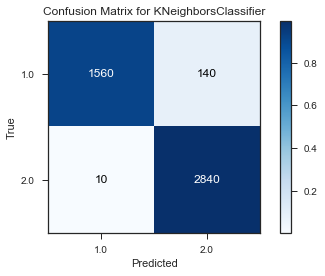

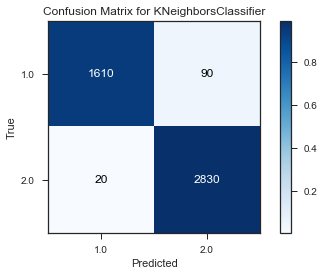

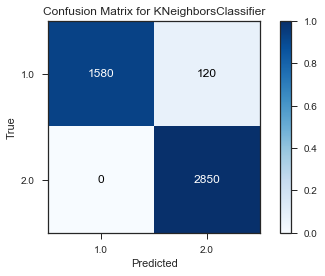

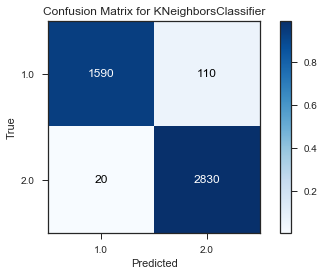

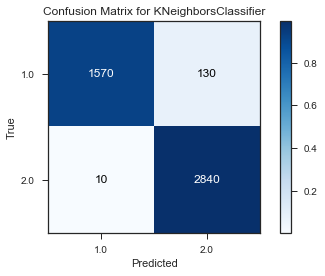

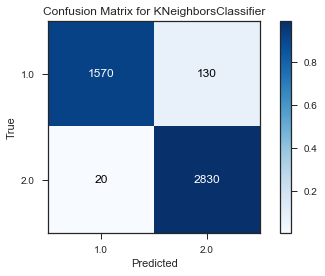

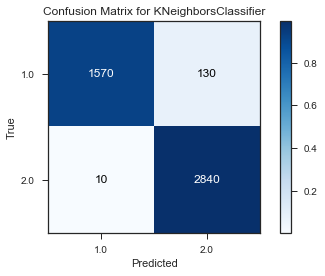

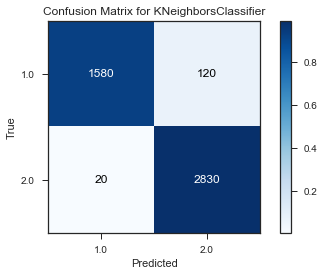

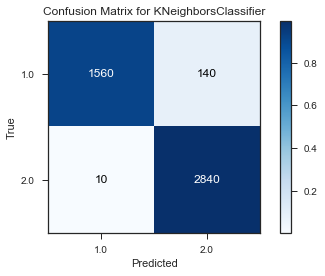

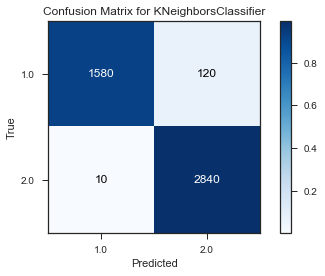

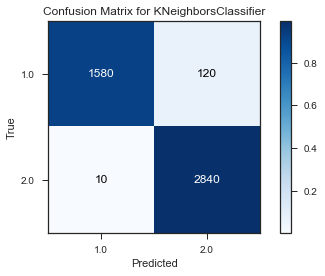

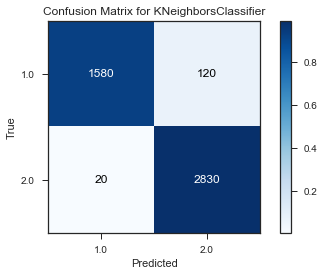

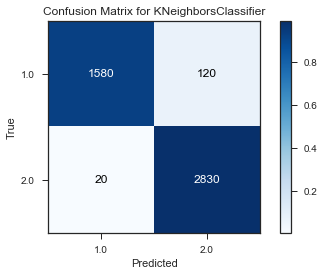

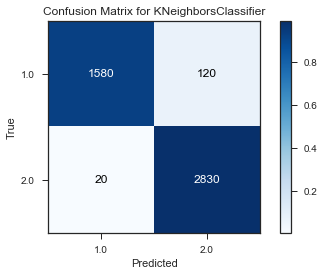

In [25]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

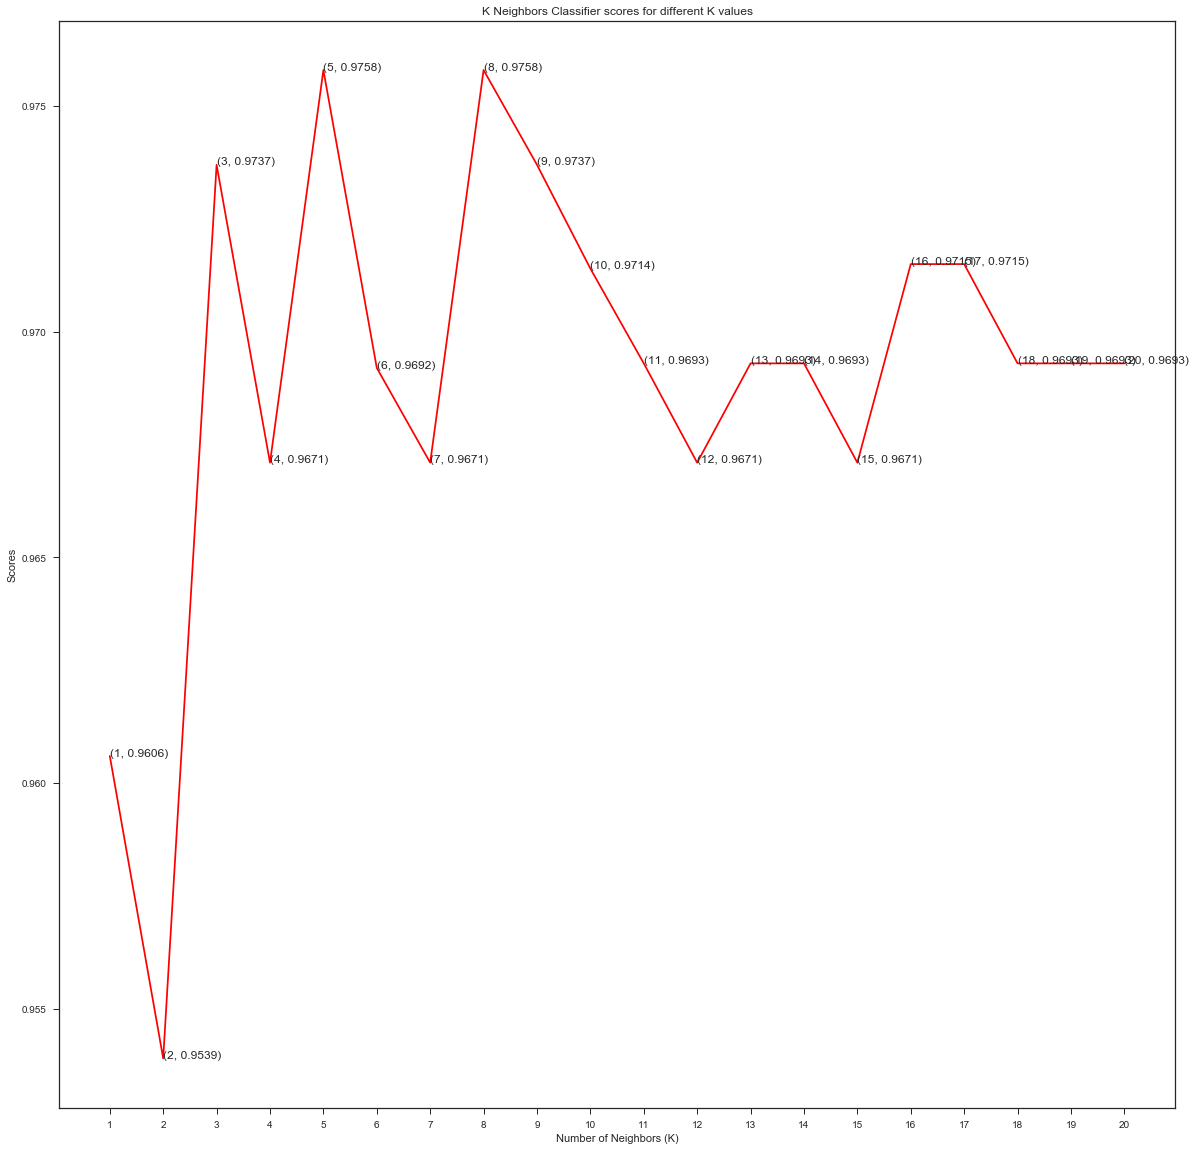

In [26]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.976 (+/- 0.025)
The IQR is 0.044 between [0.96,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97      1700
         2.0       0.97      1.00      0.98      2850

    accuracy                           0.98      4550
   macro avg       0.98      0.97      0.97      4550
weighted avg       0.98      0.98      0.98      4550

The average training time is 0.003349 seconds


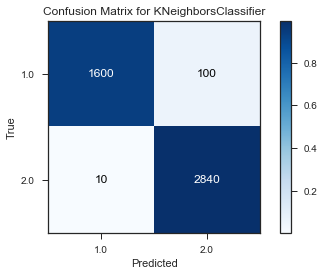

In [27]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

In [28]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.9474
              precision    recall  f1-score   support

           1       0.88      0.97      0.93        38
           2       0.99      0.93      0.96        76

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



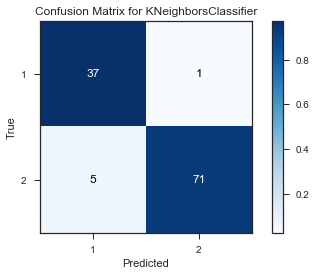

In [29]:
#  Fitting on the training data
KNN = classifiers['KNN'](9)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [30]:
from time import time

In [31]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 31.579970 seconds


The model score is 0.980 (+/- 0.025)
The IQR is 0.022 between [0.98,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97      1700
         2.0       0.98      0.99      0.98      2850

    accuracy                           0.98      4550
   macro avg       0.98      0.98      0.98      4550
weighted avg       0.98      0.98      0.98      4550

The average training time is 0.005837 seconds


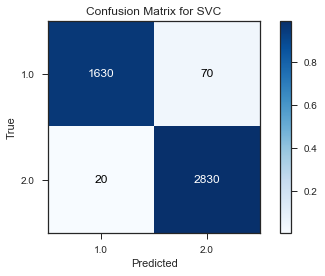

In [32]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [33]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9406593406593406 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.9406593406593406 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.0001220703125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.000244140625}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.00048828125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.0009765625}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.001953125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.00390625}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.0078125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.015625}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.03125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.0625}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.125}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.25}
0.9406593406593406 {'C': 0.03125, 'gamma': 0.5}
0.9406593406593406 {'C': 0.03125, 'gamma': 1.0}
0.9406593406593406 {'C': 0.03125, 'gamma': 2.0}
0.9406593406593406 {'C': 0.03125, 'gamma': 4.0}
0.9406593406593406 {'C': 0.03125,

The test accuracy is 0.9825
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        40
           2       1.00      0.97      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



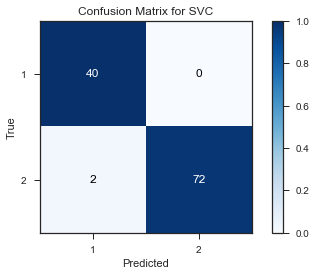

In [34]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [35]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 38.741073 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.980 (+/- 0.021)
The IQR is 0.022 between [0.98,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97      1700
         2.0       0.97      1.00      0.98      2850

    accuracy                           0.98      4550
   macro avg       0.98      0.97      0.98      4550
weighted avg       0.98      0.98      0.98      4550

The average training time is 0.006810 seconds


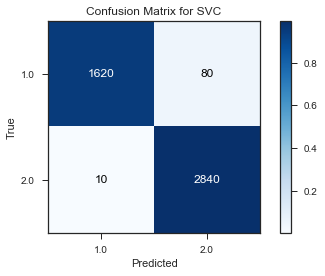

In [36]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.9649
              precision    recall  f1-score   support

           1       0.93      0.97      0.95        40
           2       0.99      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



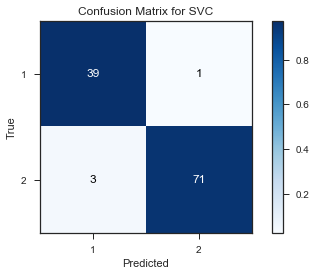

In [37]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

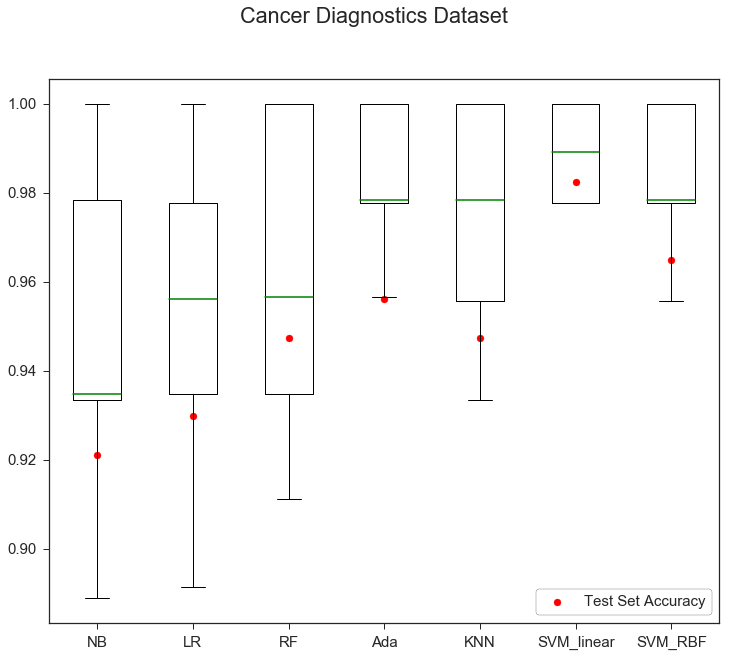

In [39]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,10))
fig.suptitle('Cancer Diagnostics Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black')
plt.show()


In [40]:
test_results

[0.9210526315789473,
 0.9298245614035088,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9824561403508771,
 0.9649122807017544]